# Movies Data Exploration
## by Atharva J Yeolekar

## Preliminary Wrangling

> This document explores a dataset containg data on movies and various OverTheTop(OTT) platforms like Netflix and Disney+ which offer them.This dataset was obtained from Kaggle.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#Loading the datasets
df = pd.read_csv('MoviesOnStreamingPlatforms.csv')
df_1 = pd.read_excel('countries.xlsx')
df_2 = pd.read_excel('genre.xlsx')

In [4]:
#Copying the data into another dataframe
movies = df.copy()

###  Data Assessing and Data Cleaning

In [5]:
movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [6]:
movies.shape

(16744, 17)

### For simplicity, let us split the rows with  multiple entries in the country and genre columns to separate column for each entry.
### I have already done the splitting using Microsoft Excel and have imported the files as df_1 and df_2.

In [7]:
df_1.columns

Index(['Country_1', 'Country_2', 'Country_3', 'Country_4', 'Country_5',
       'Country_6', 'Country_7', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26'],
      dtype='object')

### Let us only consider the first entry of the country column for our analysis.

In [8]:
movies['Country_1'] = df_1['Country_1'].copy()

In [9]:
movies.Country_1.unique()

array(['United States', 'Italy', 'United Kingdom', 'Germany', 'India',
       'Mexico', 'Ireland', 'South Africa', 'South Korea', 'Spain',
       'Hong Kong', 'France', 'Japan', 'Sweden', 'China', 'Canada',
       'Austria', 'Thailand', 'Switzerland', 'Australia', 'Hungary',
       'Indonesia', 'Argentina', 'Romania', 'Brazil', 'Uruguay',
       'Finland', 'Saudi Arabia', 'Norway', 'Cambodia', nan, 'Taiwan',
       'Israel', 'Belgium', 'Philippines', 'Georgia', 'Chile', 'Russia',
       'Pakistan', 'Netherlands', 'Denmark', 'Iraq', 'Turkey', 'Qatar',
       'Ghana', 'New Zealand', 'United Arab Emirates', 'Jamaica',
       'Bulgaria', 'Poland', 'Slovenia', 'Iceland', 'Portugal',
       'Singapore', 'Greece', 'Peru', 'Egypt', 'West Germany', 'Malaysia',
       'Croatia', 'Nigeria', 'Lebanon', 'Kenya', 'Czech Republic',
       'Colombia', 'Paraguay', 'Soviet Union', 'Bangladesh', 'Korea',
       'Serbia', 'Kuwait', 'Republic of North Macedonia', 'Iran', 'Cuba',
       'Venezuela', 'Malta'

In [10]:
#Dropping the country columns from our dataset
movies.drop('Country',axis=1,inplace=True)

In [11]:
movies.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Language', 'Runtime', 'Country_1'],
      dtype='object')

In [12]:
#Renaming the Country_1 column as Country
movies.rename(columns={'Country_1':'Country'},inplace=True)

In [13]:
movies.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Language', 'Runtime', 'Country'],
      dtype='object')

### Let us consider only the first entry of the genre column for our analysis.

In [14]:
movies['Genres_1'] = df_2['Genres'].copy() 

In [15]:
movies.Genres_1.unique()

array(['Action', 'Adventure', 'Western', 'Animation', 'Biography',
       'Drama', 'Crime', 'Comedy', 'Documentary', 'Family', 'Horror',
       'Thriller', 'Mystery', nan, 'Fantasy', 'Romance', 'Short',
       'Sci-Fi', 'Talk-Show', 'Sport', 'Reality-TV', 'Musical', 'Music',
       'War', 'News', 'History', 'Game-Show', 'Film-Noir'], dtype=object)

In [16]:
#Dropping the genres columns
movies.drop('Genres',axis=1,inplace=True)

In [17]:
movies.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Language', 'Runtime', 'Country', 'Genres_1'],
      dtype='object')

In [18]:
#Renaming the Genres_1 column as Genres
movies.rename(columns={'Genres_1':'Genres'},inplace=True)

In [19]:
movies.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Language', 'Runtime', 'Country', 'Genres'],
      dtype='object')

In [20]:
movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Language,Runtime,Country,Genres
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"English,Japanese,French",148.0,United States,Action
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski",English,136.0,United States,Action
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo",English,149.0,United States,Action
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,English,116.0,United States,Adventure
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Italian,161.0,Italy,Western


In [21]:
#Dropping the Unnamed column
movies.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
#Missing values in different columns
movies.isna().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Language             599
Runtime              592
Country              435
Genres               275
dtype: int64

 - __The Rotten Tomatoes column has almost 70% of the data missing and thus the column cannot be used for any meaningful analysis.__
 - __Several Columns have missing values.__

In [23]:
#Dropping the Rotten Tomatoes column
movies.drop('Rotten Tomatoes',axis=1,inplace=True)

In [24]:
#Checking the number of values that have missing values in Country,Runtime and IMDb columns simulataneously
movies.loc[(movies['Country'].isna()) & (movies['Runtime'].isna()) & (movies['IMDb'].isna())].shape

(195, 15)

 - __There are 195 rows which have missing value(np.nan) in all the three above mentioned rows.__

In [25]:
drop = movies.loc[(movies['Country'].isna()) & (movies['Runtime'].isna()) & (movies['IMDb'].isna())]

In [26]:
#Dropping all the above rows
movies = pd.concat([movies, drop, drop]).drop_duplicates(keep=False)

In [27]:
#Verifying that the rows have been dropped. Number of rows should be  16549
movies.shape

(16549, 15)

In [28]:
# Rechecking the total number of missing values in the dataframe
movies.isna().sum()

ID                0
Title             0
Year              0
Age            9202
IMDb            376
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
Type              0
Directors       545
Language        404
Runtime         397
Country         240
Genres          114
dtype: int64

In [29]:
#Checking the number of rows having missing values in IMDb and Runtime columns
movies.loc[(movies['Runtime'].isna()) & (movies['IMDb'].isna())].shape

(43, 15)

 - __There are 43 rows having missing values in both IMDb and Runtime columns simultaneously.__
 

In [30]:
#Dropping the above rows from the movies dataframe
drop1 = movies.loc[(movies['Runtime'].isna()) & (movies['IMDb'].isna())]
movies = pd.concat([movies, drop1, drop1]).drop_duplicates(keep=False)

In [31]:
#Verifying that the rows have been dropped. Number of rows should be  16506
movies.shape

(16506, 15)

In [32]:
#Rechecking the number of missing values in each column
movies.isna().sum()

ID                0
Title             0
Year              0
Age            9163
IMDb            333
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
Type              0
Directors       534
Language        399
Runtime         354
Country         240
Genres          113
dtype: int64

In [33]:
#Dropping all the rows having missing values in the Country column
drop2 = movies.loc[(movies['Country'].isna())]
movies = pd.concat([movies, drop2, drop2]).drop_duplicates(keep=False)

In [34]:
#Verifying that the respective rows have been dropped.Number of rows should be 16266.
movies.shape

(16266, 15)

In [35]:
movies.isna().sum()

ID                0
Title             0
Year              0
Age            8989
IMDb            311
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
Type              0
Directors       418
Language        209
Runtime         248
Country           0
Genres           24
dtype: int64

In [36]:
#Dropping all the rows having missing values in the Genres column
drop3 = movies.loc[(movies['Genres'].isna())]
movies = pd.concat([movies, drop3, drop3]).drop_duplicates(keep=False)

In [37]:
#Verifying that the respective rows have been dropped.Number of rows should be 16242.
movies.shape

(16242, 15)

In [38]:
movies.isna().sum()

ID                0
Title             0
Year              0
Age            8972
IMDb            307
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
Type              0
Directors       411
Language        207
Runtime         239
Country           0
Genres            0
dtype: int64

In [39]:
#Since only 1.5% of the rows have no value in the Runtime column, replacing the missing value by the mean value.
mean1 = movies.Runtime.mean()
mean1

93.60657376741861

In [40]:
#Let us have an integer value for the Runtime column
mean1 = 93
movies['Runtime'].fillna(mean1,inplace=True)

In [41]:
#Checking for missing values in the Runtime column
movies.Runtime.isna().sum()

0

In [42]:
#Since only 1.9% of the rows have no value in the IMDb column, replacing the missing value by the mean value.
mean2= movies.IMDb.mean()
mean2

5.8960966426106065

In [43]:
mean2=5.9
movies['IMDb'].fillna(mean2,inplace=True)

In [44]:
#Checking for missing values in the Runtime column
movies.IMDb.isna().sum()

0

In [45]:
movies.isna().sum()

ID                0
Title             0
Year              0
Age            8972
IMDb              0
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
Type              0
Directors       411
Language        207
Runtime           0
Country           0
Genres            0
dtype: int64

In [46]:
#Dropping the Age,Directors and language columns from our dataframe
movies.drop(['Age','Directors','Language'],axis=1,inplace=True)

In [47]:
movies.columns

Index(['ID', 'Title', 'Year', 'IMDb', 'Netflix', 'Hulu', 'Prime Video',
       'Disney+', 'Type', 'Runtime', 'Country', 'Genres'],
      dtype='object')

In [48]:
movies.Type.value_counts()

0    16242
Name: Type, dtype: int64

In [49]:
#Dropping the Type column from our dataframe
movies.drop('Type',axis=1,inplace=True)

In [50]:
movies.columns

Index(['ID', 'Title', 'Year', 'IMDb', 'Netflix', 'Hulu', 'Prime Video',
       'Disney+', 'Runtime', 'Country', 'Genres'],
      dtype='object')

In [51]:
movies.shape

(16242, 11)

In [52]:
movies.isna().sum()

ID             0
Title          0
Year           0
IMDb           0
Netflix        0
Hulu           0
Prime Video    0
Disney+        0
Runtime        0
Country        0
Genres         0
dtype: int64

 - __Thus there are no missing values in our dataset.__

In [53]:
#Checking for duplicates
sum(movies.duplicated())

0

 - __Thus, there are no duplicated rows in our dataset.__

In [54]:
movies.sample(1)

,ID,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime,Country,Genres
11246,11247,Ilzaam,1986,6.1,0,0,1,0,164.0,India,Drama


In [55]:
#checking the data types of our dataset's columns
movies.dtypes

ID               int64
Title           object
Year             int64
IMDb           float64
Netflix          int64
Hulu             int64
Prime Video      int64
Disney+          int64
Runtime        float64
Country         object
Genres          object
dtype: object

 - __The Country and Genres columns should be of categorical type.__

In [56]:
#Convertinf Country and Genres to categorical
movies['Country'] = pd.Categorical(movies['Country'])
movies['Genres'] = pd.Categorical(movies['Genres'])

In [57]:
movies.dtypes

ID                int64
Title            object
Year              int64
IMDb            float64
Netflix           int64
Hulu              int64
Prime Video       int64
Disney+           int64
Runtime         float64
Country        category
Genres         category
dtype: object

 - __All the columns have the correct data types assigned to them.__

### Data Analysis

In [58]:
#Proportion of movies on each of the OTT platforms
print(movies.Netflix.mean())
print(movies['Disney+'].mean())
print(movies['Prime Video'].mean())
print(movies.Hulu.mean())

0.20877970693264375
0.03454008127077946
0.74067233099372
0.05467306981898781


 - __Since the sum of the above proportions is greater than 1, it means that some of the movies are available on multiple platforms.__

In [59]:
#Descriptive Stats of the Dataset
movies.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Runtime
count,16242.000000,16242.000000,16242.00000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,8329.079424,2002.728913,5.89617,0.208780,0.054673,0.740672,0.034540,93.597648
std,4797.255133,20.844127,1.33239,0.406449,0.227348,0.438279,0.182617,27.773767
min,1.000000,1902.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4235.250000,2000.000000,5.10000,0.000000,0.000000,0.000000,0.000000,83.000000
50%,8332.500000,2012.000000,6.10000,0.000000,0.000000,1.000000,0.000000,92.000000
75%,12463.750000,2016.000000,6.90000,0.000000,0.000000,1.000000,0.000000,104.000000
max,16744.000000,2020.000000,9.30000,1.000000,1.000000,1.000000,1.000000,1256.000000


### Following observations can be made from the above table:
 - __20.1% of the movies are available on Netflix.__
 - __5.46% of the movies are available on HULU.__
 - __74% of the movies are available on Prime Video.__
 - __3.45% of the movies are available on Disney+.__
 - __The average IMDb rating of our dataset is 5.9 .__
 - __The average runtime is 93.6 .__
 - __The maximum and minimum IMDb ratings are 9.3 and 0 respectively.__

### What is the structure of your dataset?

> - There 16242 movies in our dataset with 11 features.
> - There are some quantative variables in our dataset like IMDb and Runtime.
> - There are some nominal categorical variables like Country and Genres.
> - There are no ordinal categorical variables in our dataset.

### What is the main feature of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the IMDb rating of a movie.


In [242]:
#Exporting the movies dataframe as a csv file
movies.to_csv('movies.csv',index=False)

## Univariate Exploration

> In this section, I will be studying the spread/distribution of some of the variables of our dataset.

### Year

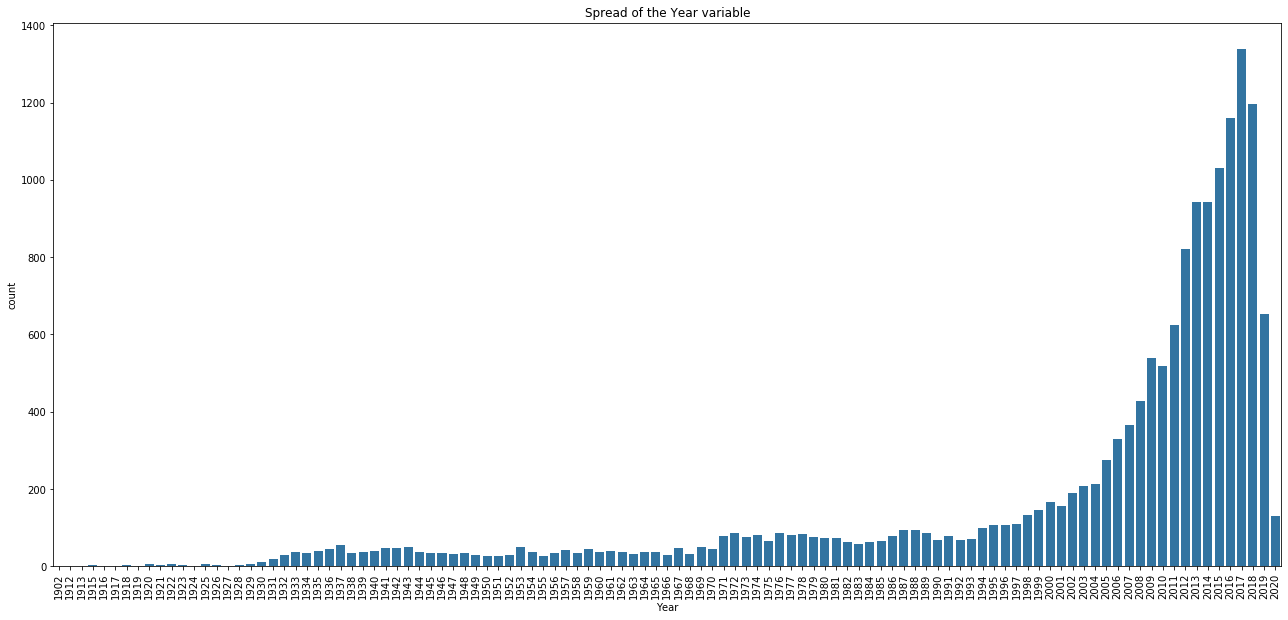

In [60]:
plt.figure(figsize=(22,10))
base = sns.color_palette()[0]
sns.countplot(data = movies,x='Year',color=base)
plt.xticks(rotation = 90)
plt.title('Spread of the Year variable');

## Following observations can be made from the above plot: 
 - __The Year variable in our dataset has a left-skewed distribution.__
 - __Thus, most of the OTT platforms provide the latest movies instead of the older movies.__
 - __Maximum movies in our dataset are from the year _2017_.__

### IMDb

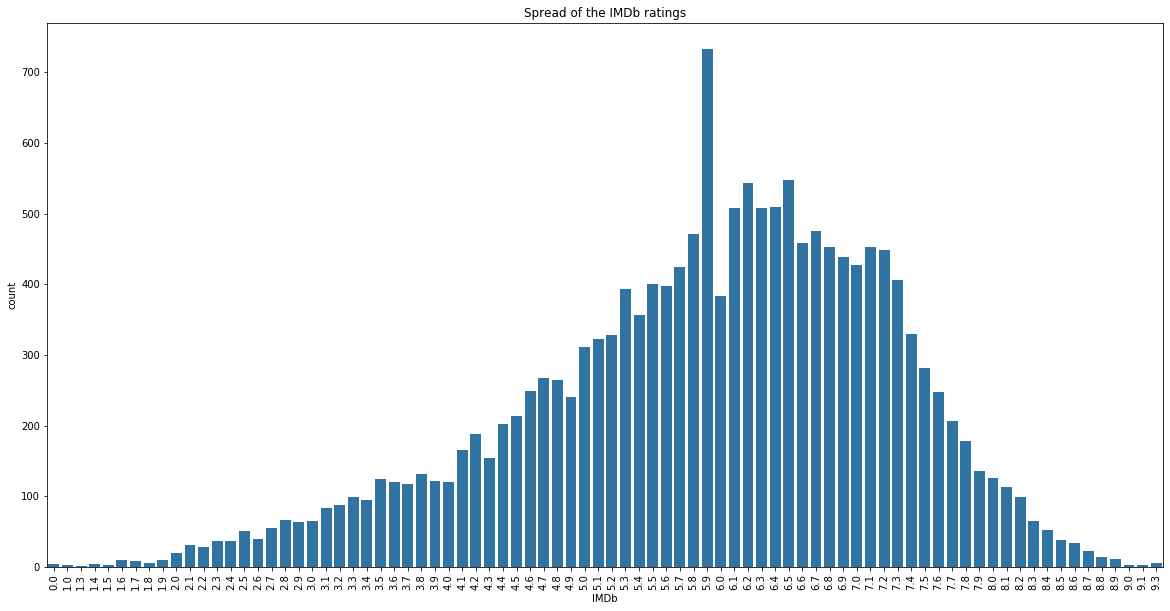

In [61]:
plt.figure(figsize=(20,10))
base = sns.color_palette()[0]
sns.countplot(data = movies,x='IMDb',color =base)
plt.xticks(rotation = 90)
plt.title('Spread of the IMDb ratings');

## Following observations can be made from the above plot: 
 - __The IMDb ratings of the movies in our seem to have a normal distribution.__
 - __More than 700 movies have a rating of 5.9 .__
 - __Majority of the movie ratings are clustered between 5.3 and 7.3 .__
 - __Very few movies have a rating greater than 9 and less than 1.5 .__

### Genres

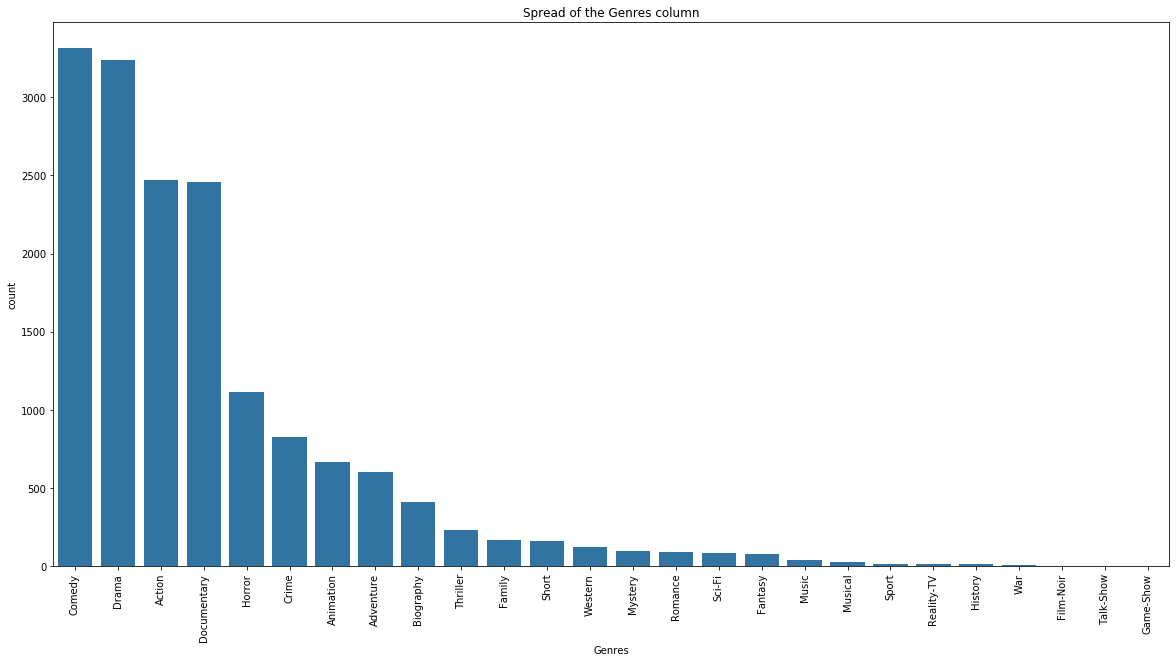

In [62]:
plt.figure(figsize=(20,10))
base = sns.color_palette()[0]
vals = movies.Genres.value_counts().index
sns.countplot(data = movies,x='Genres',color =base,order = vals)
plt.xticks(rotation = 90)
plt.title('Spread of the Genres column');

## Following observations can be made from the above plot: 
 - __Maximum movies have Comedy as their major genre.__
 - __Film-Noir,Talk Show and Game Show are the least frequent genres.__

### Country

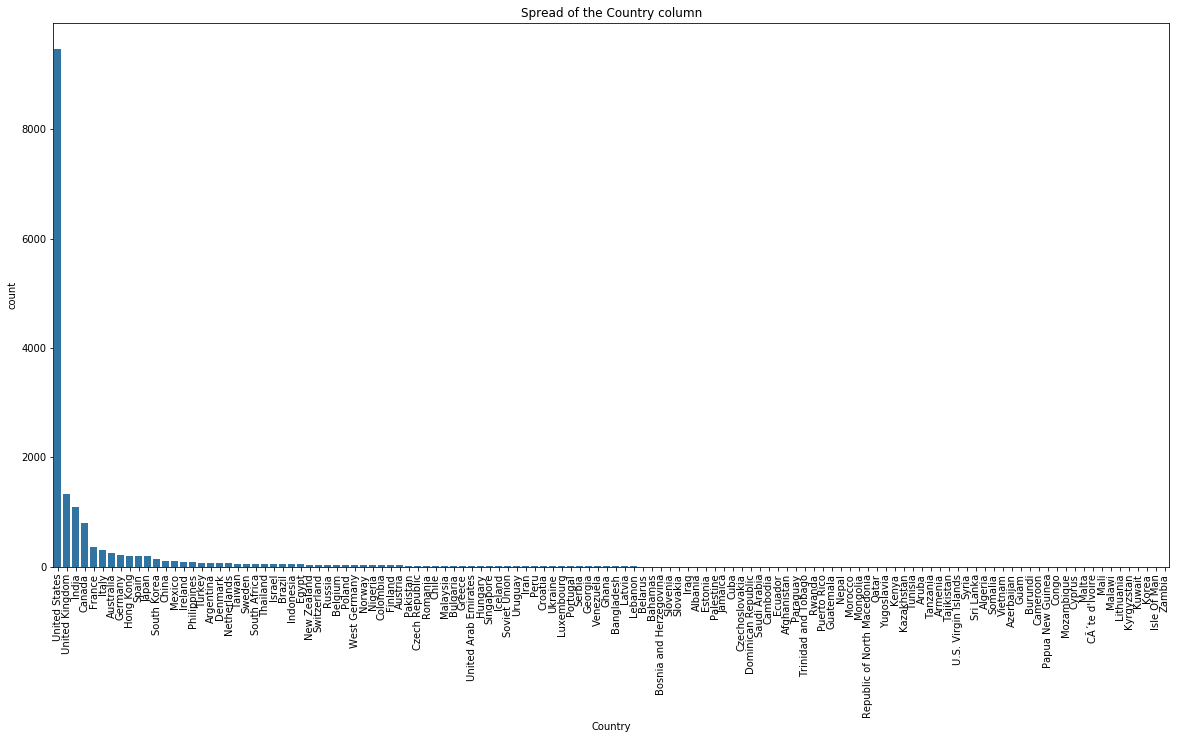

In [63]:
plt.figure(figsize=(20,10))
base = sns.color_palette()[0]
vals = movies.Country.value_counts().index
sns.countplot(data = movies,x='Country',color =base,order = vals)
plt.xticks(rotation = 90)
plt.title('Spread of the Country column');

## Following observations can be made from the above plot: 
 - __Majority of the movies have United States,United Kingdom,India and Canada as their major country of production.__
 - __The United States has an oerwhelming lead as the major country of production for the movies in our dataset.__
 - __ALmost 74% movies in the dataset have US,UK or India as their country of production.__

### Discuss the distributions of your variables of interest. Were there any unusual points? Did you need to perform any transformations?

> - __We have analysed the distributions of the Genres,Country,IMDb and Year columns from our datasets.__
> - __The Year Column appeared to be left-skewed.__
> - __The IMDb column is has a normal distribution with peak at 5.9 .__
> - __Majority of the movies belong to the Comedy and Drama genres.__
> - __There were no unusual distributions in our plots.__

## Bivariate Exploration

> In this section, I will analyse the bivariate relationships between some of the features of our dataset.

## IMDb vs Year

In [65]:
#Let us consider only movies after the year 2000.
df_y = movies[movies['Year'] >= 2000]

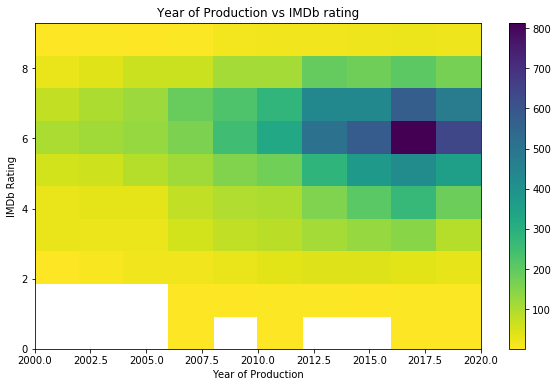

In [91]:
#Plotting Heatmap
plt.figure(figsize=(10,6))
plt.hist2d(data=df_y,x='Year',y='IMDb',cmin=1,cmap='viridis_r')
plt.colorbar()
plt.xlabel('Year of Production')
plt.ylabel('IMDb Rating')
plt.title('Year of Production vs IMDb rating');

## Following observations can be made from the above plot:
 - __The highest populous cluster of films is between the period 2015-2019 with the rating between 5.75 and 7.5.__
 - __There are very few or no films in the period from 2000-2006 that have a rating less than 2.0 .__
 - __Similarly, there were no films in the years 2007-2010 and 2012-2016 that had a rating less than 1.0 .__
 - __There were more than 800 films in the period 2016-2018 that had an average rating of 6.__
 - __There does not seem to be any general trend between the Year and IMDb features of our dataset.__

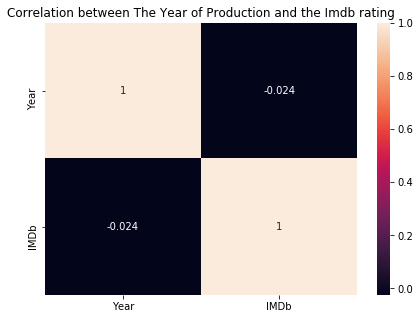

In [67]:
#Correlation between Year and IMDb rating
plt.figure(figsize=(7,5))
corr = movies[['Year','IMDb']].corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation between The Year of Production and the Imdb rating');

### Following observations can be made from the above plot:
 - __There is a very weak negative correlation between the concerned features.__
 - __Since the correlation is very low, we can say that the IMDb rating of the movie is not affected by the Year of its Production.__
 - __Thus, the above heatmap proves our observation from the previous Heatmap that the IMDb rating of a movie is not(barely) affected by the Year of its Production.__

## IMDb vs Runtime

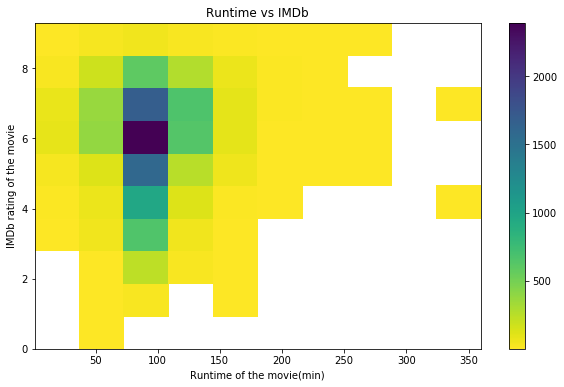

In [243]:
#Plotting Heatmap
plt.figure(figsize=(10,6))
plt.hist2d(data=df_y,x='Runtime',y='IMDb',cmin=1,cmap='viridis_r')
plt.colorbar()
plt.xlabel('Runtime of the movie(min)')
plt.ylabel('IMDb rating of the movie')
plt.title('Runtime vs IMDb');

## Following are the observations from the above heatmap:
 - __There are very few movies with runtime more than 300 minutes.__
 - __There are no movies with runtime more than 200 minutes and IMDB rating less than 4.__
 - __Majority of the movies are clustered in the region with runtime around 100 minutes and IMDb rating between 5.5-7.5 .__
 - __It appears as if there is no general trend between the runtime of the movie and its IMDb rating.__

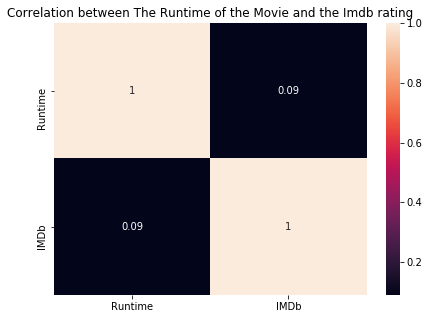

In [88]:
#Plotting correlation heatmap
plt.figure(figsize=(7,5))
corr = movies[['Runtime','IMDb']].corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation between The Runtime of the Movie and the Imdb rating');

## Following observations can be made from the above heatmap:
- __There is weak positive correlation between the runtime and the IMDb rating of a movie.__
- __This means that the increase in the runtime of a movie minutely affects its IMDb rating,__
- __This proves our observation from the previous heatmap that the IMDb rating of a movie is barely affected by its Runtime.__

## IMDb vs Country

 - __For this analysis let us consider only the movies from U.S.A,U.K and India as all the other countries have very few movies.__

In [135]:
cou = ['United States','United Kingdom','India']
df_c = movies[movies['Country'].isin(cou)]

In [136]:
df_c.shape

(11877, 11)

 - __Thus almost 74% of the movies in our dataset have been produced in the above mentioned three countries.__


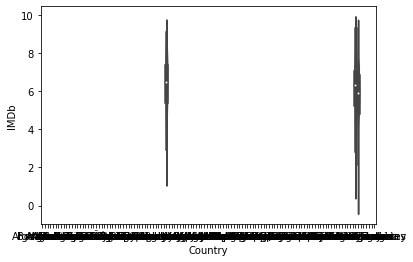

In [163]:
sns.violinplot(data=df_c,y='IMDb',x='Country')

### Using the above code, we are getting a plot that has a violin plot for all the countries in our original data set which makes it impossible to interpret the plot. Thus I have plotted all the violin plots using faceting and the screenshots of the concerned plots have been imported in the following cells.

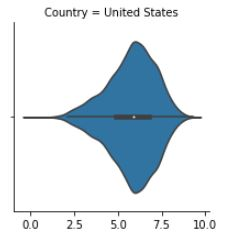

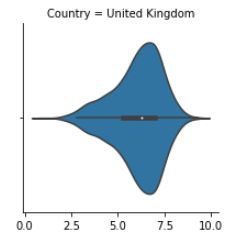

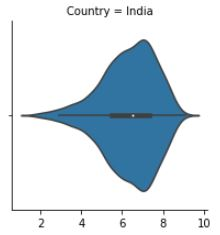

## Following observations can be made from the above violin plots:
 - __All the three countries have a normally distributed plots as far as IMDb movies are concerned.__
 - __Half the movies(Inter-Quartile Range) produced in the United States have been rated between 4.9 and 7.3 .__ 
 - __Half the movies(Inter-Quartile Range) produced in the United Kingdom have been rated between 5 and 7.5 .__
 - __Half the movies(Inter-Quartile Range) produced in India have been rated between 6 and 8 .__ 
 - __Thus,the movies in our dataset that have been produced in India have higher IMDb rating as compared to movies produced in USA and UK.__
 

## IMDb VS Genres

In [178]:
movies.Genres.value_counts()

Comedy         3313
Drama          3241
Action         2473
Documentary    2457
Horror         1112
Crime           825
Animation       664
Adventure       601
Biography       413
Thriller        228
Family          167
Short           161
Western         121
Mystery          97
Romance          92
Sci-Fi           83
Fantasy          75
Music            40
Musical          29
Sport            13
Reality-TV       12
History          11
War               8
Film-Noir         3
Talk-Show         2
Game-Show         1
Name: Genres, dtype: int64

### Let us consider only the Comedy,Drama,Action,Documentary,Horror,Crime,Animation and Thriller genres for our analysis.

In [179]:
Gen = ['Comedy','Drama','Action','Documentary','Horror','Crime','Animation','Thriller']
df_g = movies[movies['Genres'].isin(Gen)]

In [180]:
df_g.Genres.value_counts()

Comedy         3313
Drama          3241
Action         2473
Documentary    2457
Horror         1112
Crime           825
Animation       664
Thriller        228
Game-Show         0
Adventure         0
Biography         0
Family            0
Fantasy           0
Film-Noir         0
Western           0
War               0
Music             0
Musical           0
Mystery           0
Reality-TV        0
Romance           0
Sci-Fi            0
Short             0
Sport             0
Talk-Show         0
History           0
Name: Genres, dtype: int64

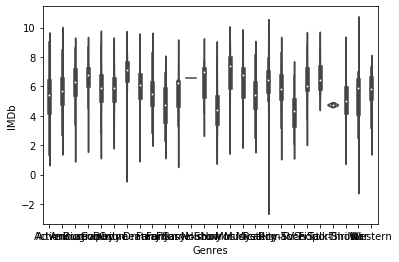

In [181]:
sns.violinplot(data=df_c,y='IMDb',x='Genres')

### Since the above plot is difficult to interpret,I have faceted along the genres column and attached the screenshots in the following cells.

Faceting code
order = df_g.Genres.value_counts().index
g=sns.FacetGrid(data=df_c,col='Genres',col_wrap=3,col_order=order,sharex=False)
g.map(sns.violinplot,'IMDb');

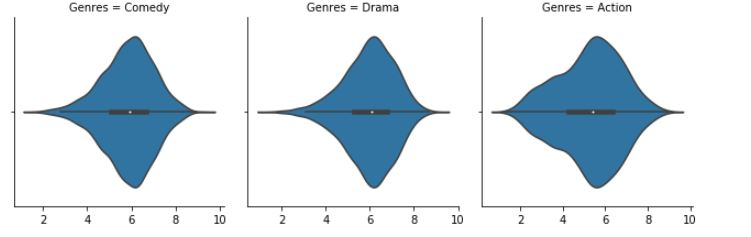

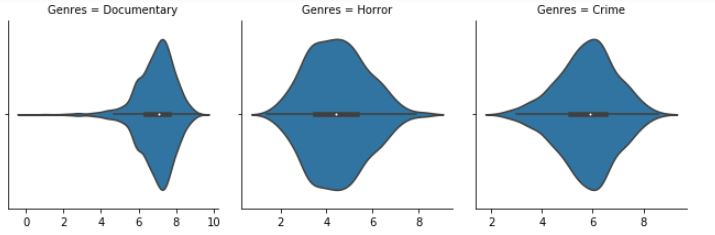

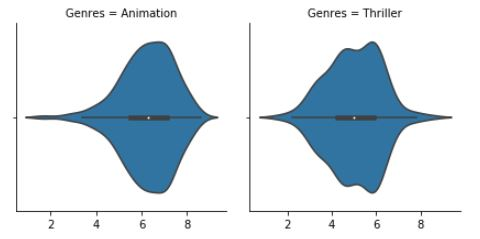

## Following obsevations can be made from the above violin plots:
- __The documentary Genre has the highest median rating.__
- __The horror genre has the lowest median rating.__
- __All the above genres have a normal distribution of their corresponding IMDb ratings.__
- __The documentary genre generally has a higher rating as compared to the other genres as 50% of its spread(IQR) is between the ratings 6 and 8.__
- __Apart from the Documentary genre, all the genres have a wide spread of ratings.__
- __The horror genre has generally has a lower rating as compared to the other genres as its IQR is between the ratings 3 and 5 5 .__
- __The action and thriller genres seem to have the widest spread of values.__
- __The documentary genre is the only genre having a movie with a raitng og 0.__
- __The horror genre has a higher proportion of movies lower ratings(<5) as compared to the other genres.__

## IMDb vs OTT platforms

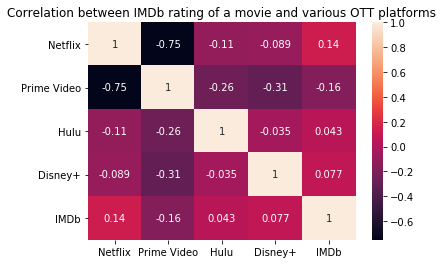

In [199]:
#plotting a correlation heatmap between the IMDb ratings of a movie and the various OTT platforms.
corr = movies[['Netflix','Prime Video','Hulu','Disney+','IMDb']].corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation between IMDb rating of a movie and various OTT platforms');

## Following observations can be made from the above heatmap:
- __There is weak positive correlation between Netflix and IMDb rating, that is if a movie is offered by Netflix, it has a weak postive effect on its IMDb rating(The rating increases).__
- __There is weak negative correlation between Prime Video and IMDb rating, that is if a movie is offered by Prime Video, it has a weak negative effect on its IMDb rating(The rating decreases).__
- __Both Hulu and Disney+ have a very weak positive correlation with the IMDb rating of a movie offered by them,thus it has a negligible effect on the movie's IMDb rating.__
- __There is a strong negative correlation between Netflix and Prime Video, that is if a movie is offered by Netflix,it is highly unlikely that Prime Video will offer the same movie and vice-versa.__
- __There is negative correlation between Netflix and Hulu.However the correlatio  is very weak to make any concrete inferences.This is same for Netflix and Disney+.__ 
- __There is a moderate negative correlation between Prime Video and Hulu.Thus, if a movie is offered by Prime Video,there is a decent chance that Hulu would not offer the same movie.There is a similar relation between Prime Video and Disney+.__
- __There is a very weak negative correlation between Disney+ and Hulu.That mean that if a movie is offered by Disney+.we cannot say whether Hulu would offer the same movie and vice-versa.__

### The ID and Title features of a movie are unique for each movie and no significant analysis can be carried out using them.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> I analysed the bivariate relationship between several features of our dataset in this section.The IMDB rating of a movie is not affected by its Year of Production and its Runtime(Weak correlation).Surprisingly of all the features in our dataset, Netflix and Prime Video have the highest correlation(albeit weak) with IMDb rating of a movie(0.14 and -0.16).Another interesting observation was that the movies produced in India generally have a higher average IMDb rating than the movies from U.S and U.K. Speaking of Genres,the documentary genre has the highest average IMDb rating and the Horror genre has the lowest averege IMDb rating.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> I also analysed the correlation between the various OTT platforms. There is strong negative correlation between Netflix and Prime Video which indicates that if a movie is available on one platform, it is highly unlikely that the movie would be available on the other platform.However, this observation seems to be obvious as these two platforms are among the industry leaders.

## Multivariate Exploration

> In the following section,I would be analysing multivariate relationships among the features of our dataset.

## IMDb vs Runtime vs Year

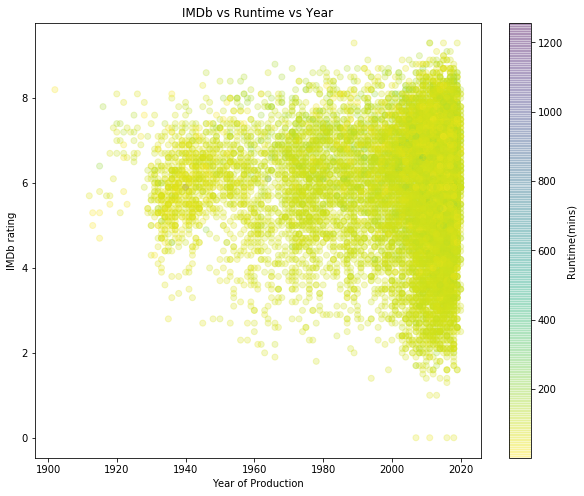

In [214]:
plt.figure(figsize=(10,8))
plt.scatter(data=movies,y='IMDb',x='Year',c='Runtime',cmap='viridis_r',alpha=0.25)
plt.colorbar(label='Runtime(mins)')
plt.xlabel('Year of Production')
plt.ylabel('IMDb rating')
plt.title('IMDb vs Runtime vs Year');

 - __The above plot seems bit overpopulated, thus I have taken a sample from the population and replotted the above scatter plot.__

In [219]:
#Creating a sample of our data set
movies_subs =movies.sample(5000,replace=False,random_state=2018)

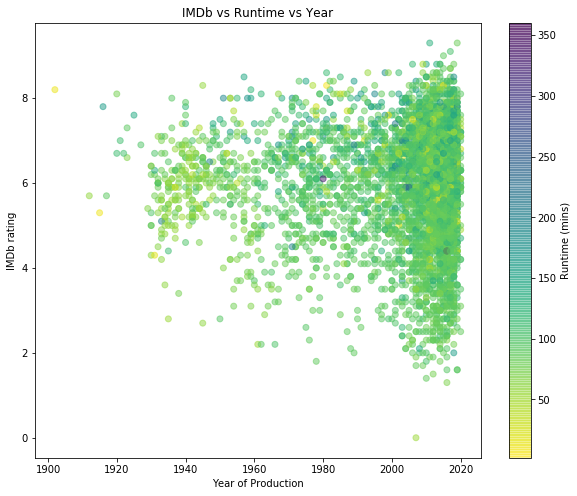

In [224]:
plt.figure(figsize=(10,8))
plt.scatter(data=movies_subs,y='IMDb',x='Year',c='Runtime',cmap='viridis_r',alpha=0.5)
plt.colorbar(label='Runtime (mins)')
plt.xlabel('Year of Production')
plt.ylabel('IMDb rating')
plt.title('IMDb vs Runtime vs Year');

## Following are the observations from the above plot:
 - __Majority of the movies in our dataset have been produced in the 21st century.__
 - __There is only very few movies in our dataset that have been produced in the earlier part of the 20th century.__
 - __Majority of the movies have a runtime between 100 and 150 minutes.__
 - __There is no specific trend between the IMDb rating and the other two features in our dataset.__
 - __There are very few movies with runtime greater than 250 minutes.__
 

## IMDb vs Genres vs Year

In [240]:
order = df_g.Genres.value_counts().index
g=sns.FacetGrid(data=df_g,col='Genres',col_wrap=3,col_order=order,sharex=False)
g.map(plt.scatter,'Year','IMDb');

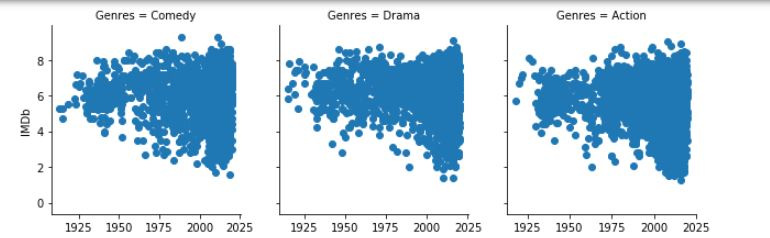

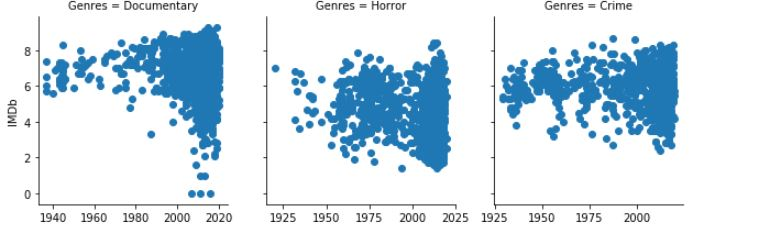

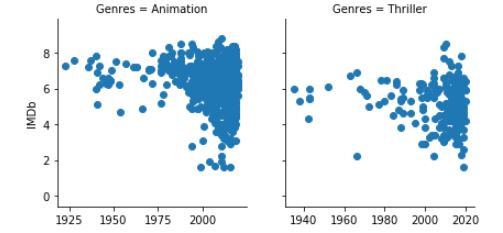

## Following observations can be made from the above plots:
 - __All the plots follow a similer trend, that is majority of the films across all the above genres have been produced in the 21st century.__
 - __The crime genre has no movie with a lower rating(<2).__
 - __There are very few movies of the thriller genre in the 20th century.__
 - __There is no general trend between the IMDb rating of the movie and its year of production even when the movies are separated by their genres.__

## IMDb vs Year vs Country

In [234]:
order = df_c.Country.value_counts().index
g=sns.FacetGrid(data=df_c,col='Country',col_wrap=3,col_order=order,sharex=False)
g.map(plt.scatter,'Year','IMDb');

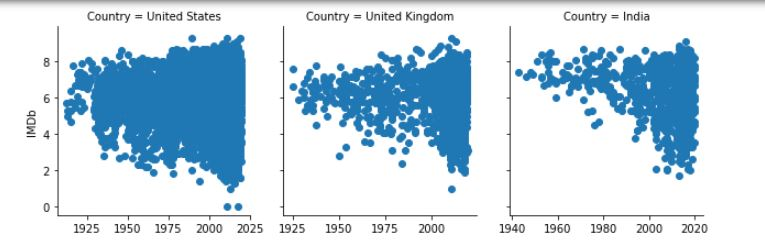

## Following observations can be made from the above plots:
 - __Majority if the films produced are from the United States.__
 - __The number of countries produced in India has significantly increased in the 21st century.__
 - __There are very few movies from United Kingdom with a low rating(<2).__
 - __There are even less movies from India with a low rating(<2).__
 - __Despite segregating the movies with their country of production, no concrete trend could be found between the IMDb rating of a movie and its Year of Production.__

## IMDb vs Runtime vs Genres

In [236]:
order = df_g.Genres.value_counts().index
g=sns.FacetGrid(data=df_g,col='Genres',col_wrap=3,col_order=order,sharex=False)
g.map(plt.scatter,'Runtime','IMDb');

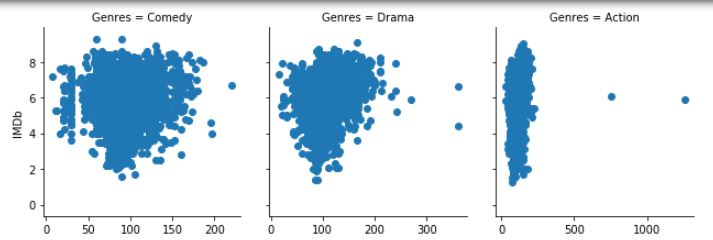

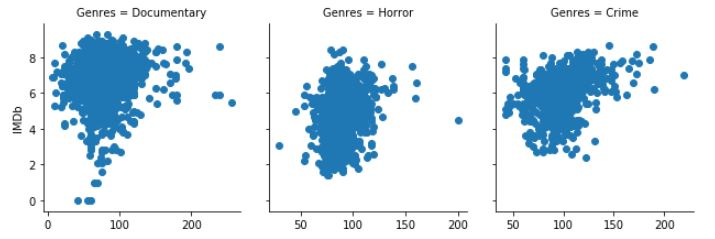

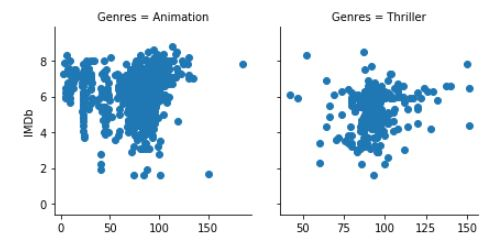

## Following observations can be made from the above plots:
- __Majority of the movies have a runtime less than 200 minutes.__
- __There are some outliers(in the action genre) with a runtime of more than 500 minutes.__
- __Despite segregating the movies wrt their genres, no concrete trend could be found between the Runtime and IMDb features of our dataset.__

## IMDb vs Runtime vs Country

In [238]:
order = df_c.Country.value_counts().index
g=sns.FacetGrid(data=df_c,col='Country',col_wrap=3,col_order=order,sharex=False)
g.map(plt.scatter,'Runtime','IMDb');

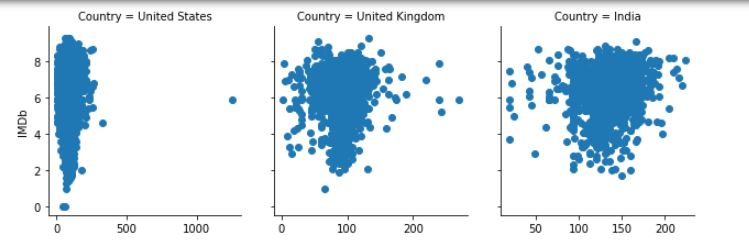

## Following observations can be made from the above plots:
- __The movies in India generally have a greater average runtime than U.S  and U.K.__
- __There is a significant outlier from U.S which has a runtime greater than 1000 minutes.__
- __Movies from UK generally have a runtime less than 200 minutes.__
- __Despite segregating the movies wrt their country of production, no concrete trend could be found between the Runtime and IMDb features of our dataset.__

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> I extended my analysis of the IMDb rating of a movie against various features of our dataset in this section.Despite segregating the dataset on basis of its Country of Production and its Genre, no concrete trend could be found between the IMDb rating of the movie and its Year of production.Similar can be said for the relationship between the IMDb rating and the runtime of the movie.

## Conclusion of the analysis:
 - __There is no feature in our dataset that significantly affects the IMDb rating of a movie.__
 - __There is strong negative correlation between the availability of a movie on Netflix and Prime Video.__ 

### Limitations:
- __Since an overwhelming number of rows did not have any data in the rotten tomatoes column,no significant analysis could be performed on that column or using that column and thus that column had to be dropped.__

### I have used my personal notes for this project.

#### Please refer the readme and the slide deck files for further information about this project.